# Online Retail Data Analysis

## Project Overview
This project analyzes an online retail dataset to gain insights into customer behavior, sales trends, and product performance.

## Dataset Information
- **Source:** Online_Retail.csv
- **Key Columns:** InvoiceNo, StockCode, Description, Quantity, InvoiceDate, UnitPrice, CustomerID, Country
- **Objective:** Perform data cleaning and exploratory data analysis to extract meaningful insights.

---


In [16]:
import pandas as pd

## Data Cleaning

Before analysis, we must clean the data:
- Handle missing values.
- Ensure proper data types.
- Remove duplicates if any.


In [17]:
df = pd.read_csv('Online_Retail.csv', encoding='ISO-8859-1')  
df.head(5)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/10 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/10 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/10 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/10 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/10 8:26,3.39,17850.0,United Kingdom


In [18]:
print(df.info())
print(df.shape)
print((df['CustomerID'].isnull().sum()/ df.shape[0]) * 100)
# Fill missing descriptions with "Unknown"
df['Description'] = df['Description'].fillna('Unknown')

# Option 1: Keep CustomerID numeric (as float or int)
df['CustomerID'] = df['CustomerID'].fillna(0)  # still float

# Option 2: Convert CustomerID to integer (nullable type)
# df['CustomerID'] = df['CustomerID'].astype('Int64').fillna(0)

# Option 3: Convert CustomerID to string
# df['CustomerID'] = df['CustomerID'].astype('str').fillna('0')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB
None
(541909, 8)
24.926694334288598


In [19]:
df.isnull().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  541909 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   541909 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


## Exploratory Data Analysis (EDA)

Now, we will analyze the data using statistical summaries and visualizations.


In [29]:
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])
df['CustomerID'] = df['CustomerID'].astype('int64')
print(df['InvoiceDate'].head())

0   2010-12-01 08:26:00
1   2010-12-01 08:26:00
2   2010-12-01 08:26:00
3   2010-12-01 08:26:00
4   2010-12-01 08:26:00
Name: InvoiceDate, dtype: datetime64[ns]


In [ ]:
df = df.drop_duplicates()
print(df.duplicated().sum())

0


In [23]:
df['TotalPrice'] = df['Quantity'] * df['UnitPrice']
df['Month'] = df['InvoiceDate'].dt.month  
df['Day'] = df['InvoiceDate'].dt.day  
df['Hour'] = df['InvoiceDate'].dt.hour

In [24]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice,Month,Day,Hour
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,15.30,12,1,8
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,12,1,8
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,22.00,12,1,8
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,12,1,8
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,12,1,8


In [25]:
sales_trend = df.pivot_table(values='TotalPrice', index='Month', aggfunc='sum') 
print(sales_trend) 

        TotalPrice
Month             
1       558448.560
2       497026.410
3       682013.980
4       492367.841
5       722094.100
6       689977.230
7       680156.991
8       681386.460
9      1017596.682
10     1069368.230
11     1456145.800
12     1179424.670


In [26]:
top_products = df.groupby('Description')['TotalPrice'].sum().sort_values(ascending=False).head(10)
top_products

Description
DOTCOM POSTAGE                        206245.48
REGENCY CAKESTAND 3 TIER              164459.49
WHITE HANGING HEART T-LIGHT HOLDER     99612.42
PARTY BUNTING                          98243.88
JUMBO BAG RED RETROSPOT                92175.79
RABBIT NIGHT LIGHT                     66661.63
POSTAGE                                66230.64
PAPER CHAIN KIT 50'S CHRISTMAS         63715.24
ASSORTED COLOUR BIRD ORNAMENT          58792.42
CHILLI LIGHTS                          53746.66
Name: TotalPrice, dtype: float64

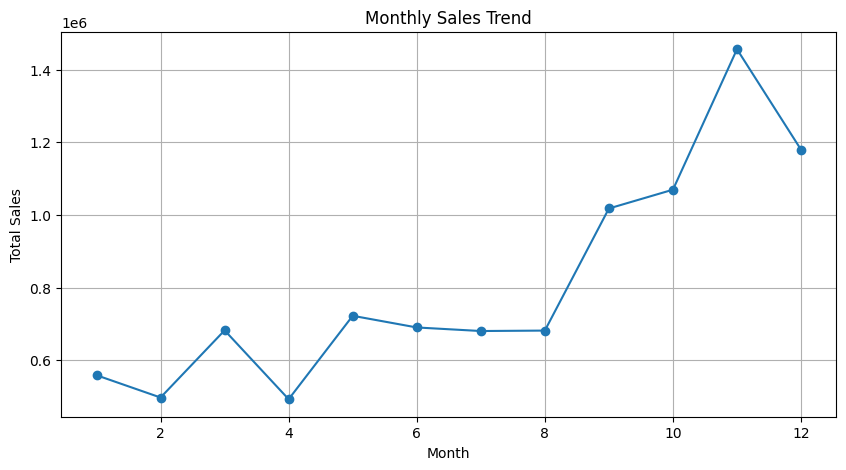

In [27]:
import matplotlib.pyplot as plt  

monthly_sales = df.groupby('Month')['TotalPrice'].sum()  

plt.figure(figsize=(10, 5))  
plt.plot(monthly_sales.index, monthly_sales.values, marker='o', linestyle='-')  
plt.xlabel("Month")  
plt.ylabel("Total Sales")  
plt.title("Monthly Sales Trend")  
plt.grid()  
plt.show()  

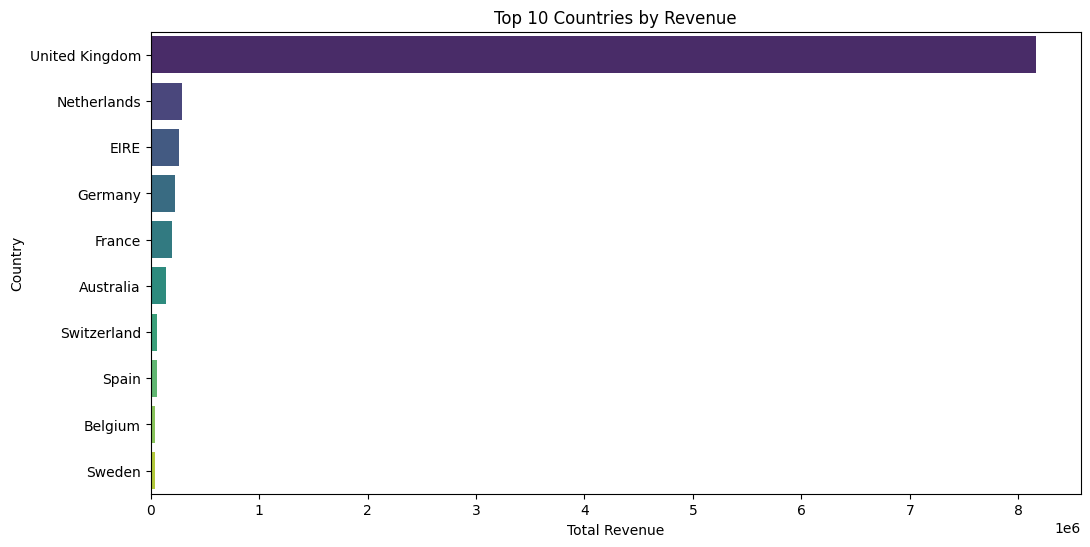

In [30]:
import matplotlib.pyplot as plt
import seaborn as sns

top_countries = df.groupby('Country')['TotalPrice'].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(12, 6))
sns.barplot(
    x=top_countries.values,
    y=top_countries.index,
    hue=top_countries.index,         # Add hue to satisfy future seaborn behavior
    palette="viridis",
    legend=False                     # Disable legend (not useful here)
)
plt.xlabel("Total Revenue")
plt.ylabel("Country")
plt.title("Top 10 Countries by Revenue")
plt.show()

## 📌 Conclusion

Through this analysis of the Online Retail dataset, we uncovered several key insights:

- **Geographical Insights**: The United Kingdom accounts for the majority of total revenue, indicating a highly localized customer base. This suggests the business is UK-centric and may have significant growth potential in international markets.
- **Customer Behavior**: A significant portion of transactions are concentrated among a smaller subset of customers, indicating potential for targeted marketing.
- **Sales Trends**: Sales volume fluctuates by month, with noticeable peaks suggesting seasonal buying behavior.
- **Top Products**: A handful of products contribute to the majority of sales, revealing opportunities for inventory optimization.
- **Data Quality**: The dataset contained missing values and duplicates, which were handled during the cleaning phase to ensure accurate analysis.

Overall, this exploratory analysis provides a solid foundation for business strategies such as customer segmentation, sales forecasting, and product recommendation systems.
